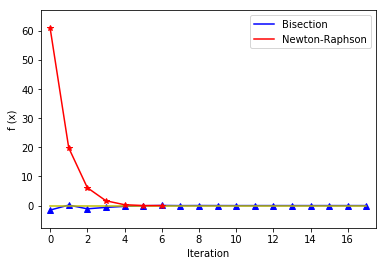

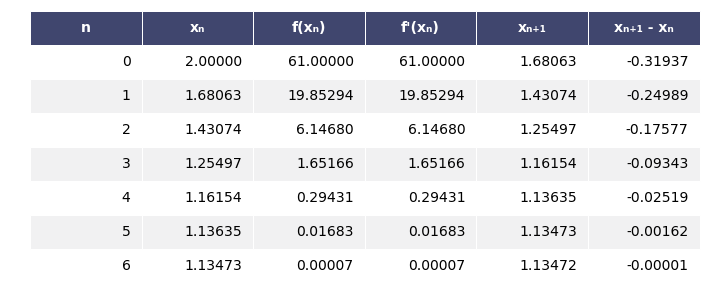

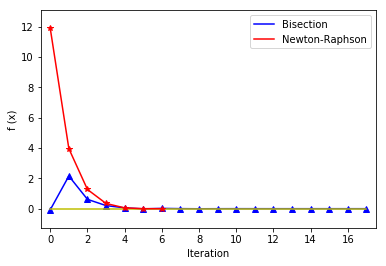

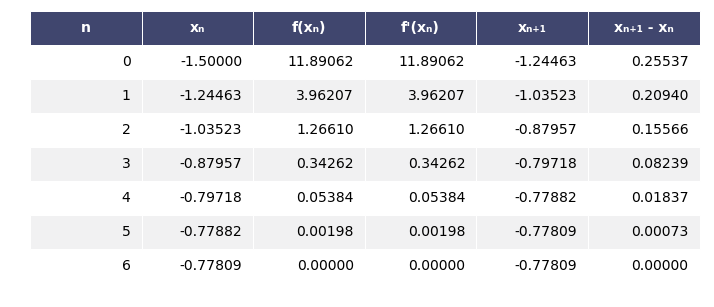

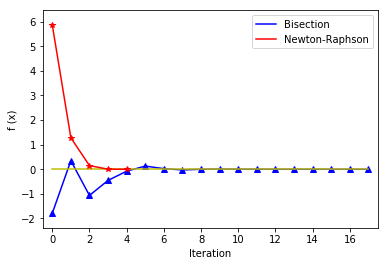

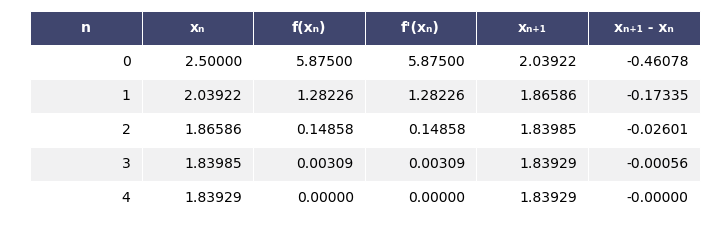

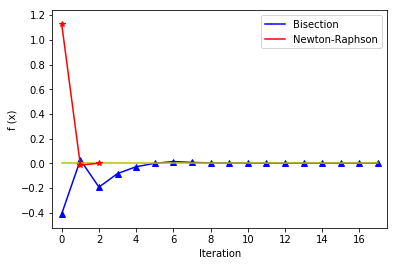

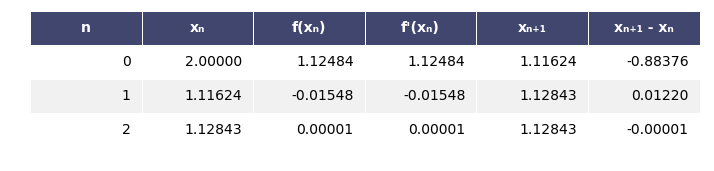

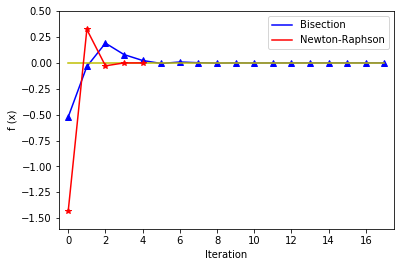

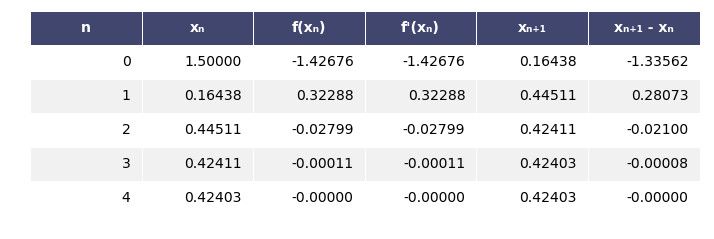

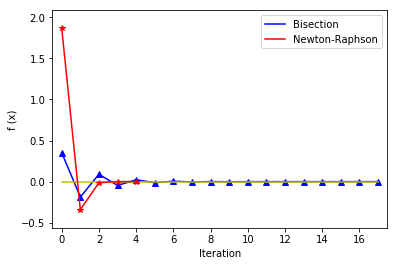

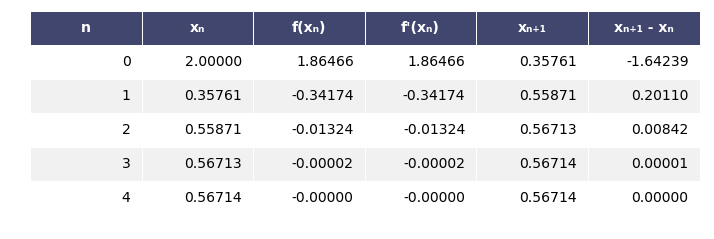

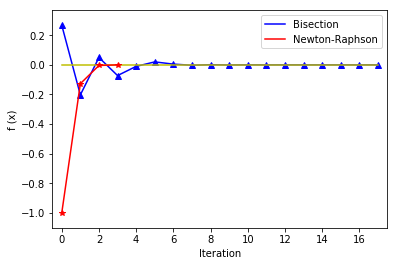

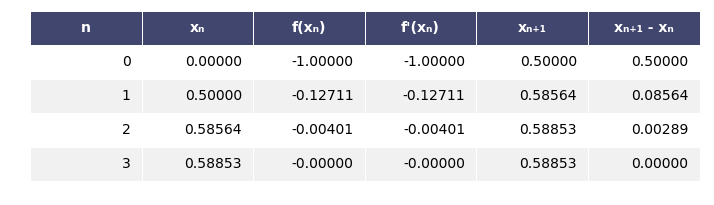

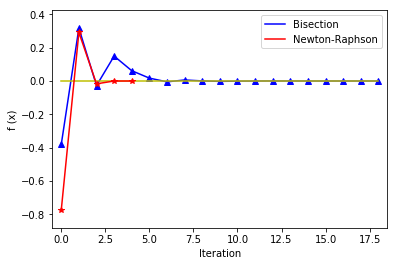

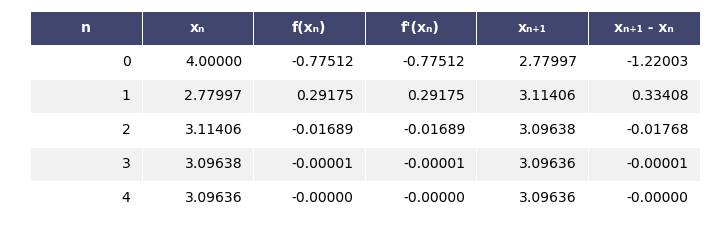

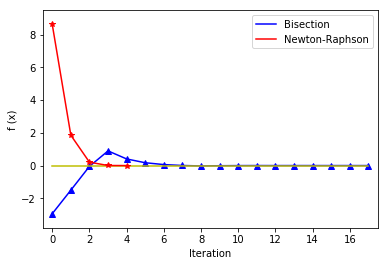

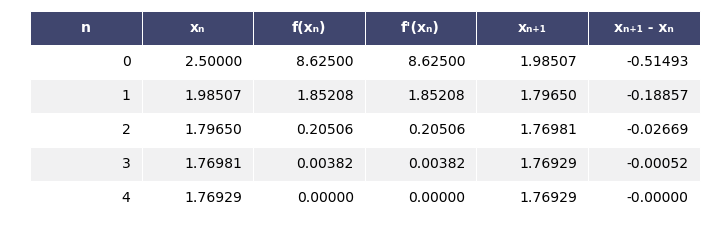

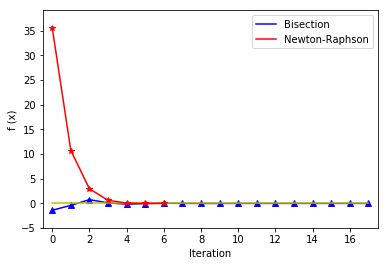

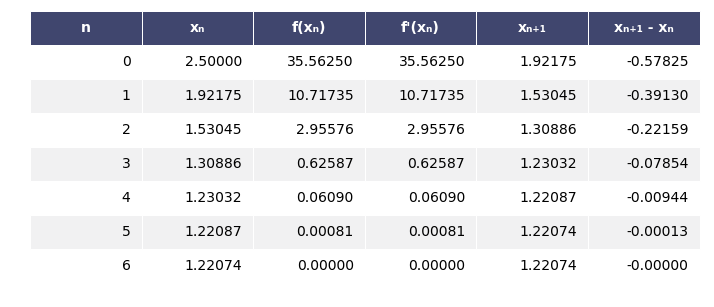

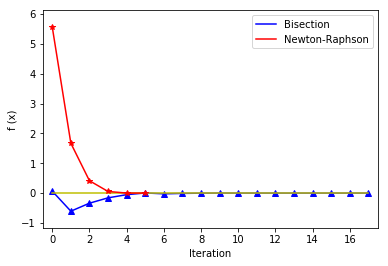

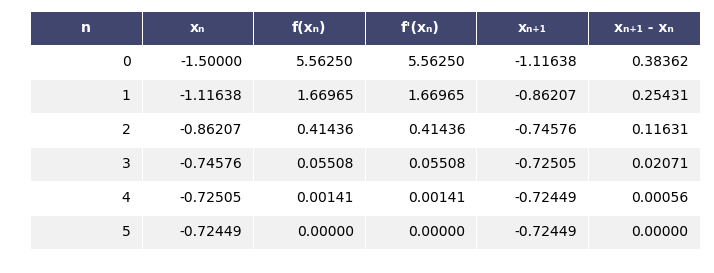

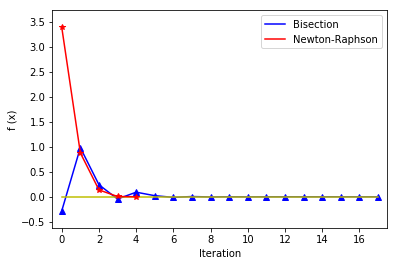

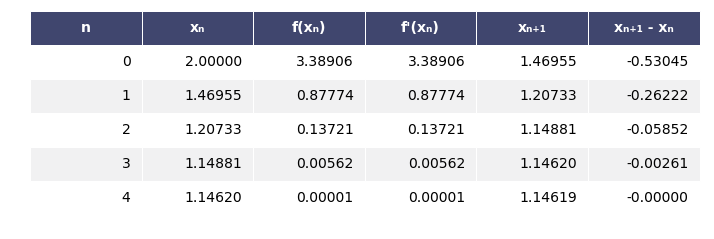

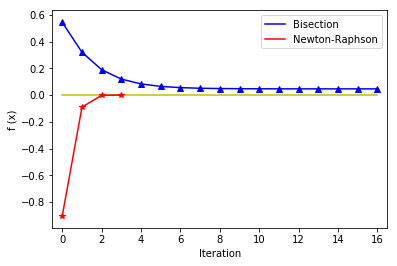

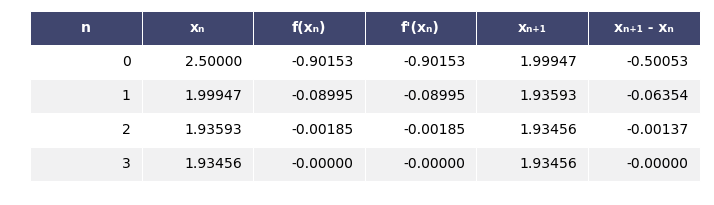

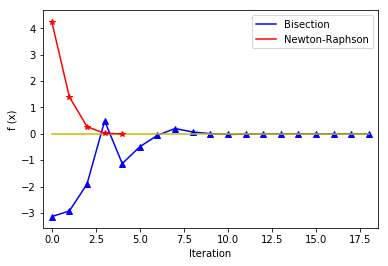

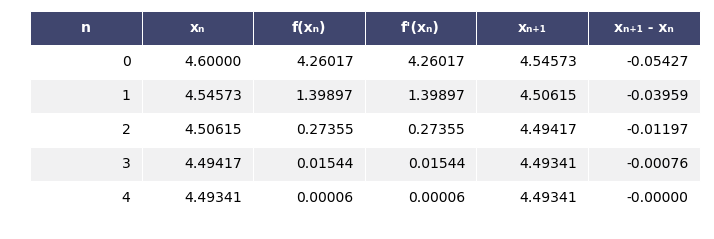

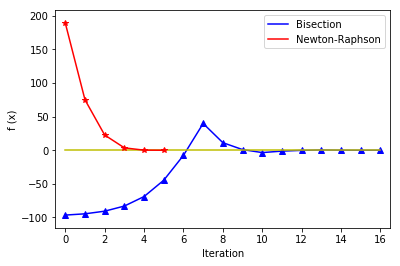

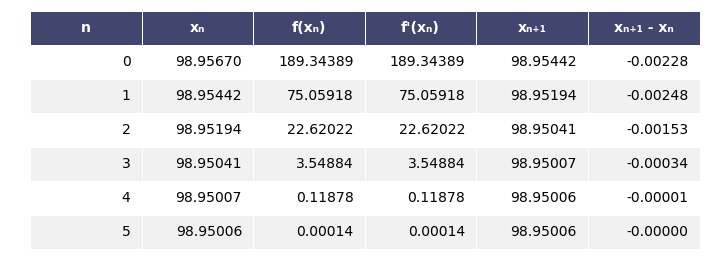

In [0]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.misc import derivative as drv
import six

dx=1e-9

n=11
j=[1 for i in range(n)]
j[0]=j[5]=j[7]=j[10]=2

ar=[[0,0] for i in range(n)]
br=[[0,0] for i in range(n)]
cr=[[0,0] for i in range(n)]
    
ar[0][0]=0.1
ar[0][1]=-1.5
br[0][0]=1.5
cr[0][0]=2
cr[0][1]=-1.5

ar[1][0]=0.1
br[1][0]=2.5
cr[1][0]=2.5

ar[2][0]=0.1
br[2][0]=1.5
cr[2][0]=2

ar[3][0]=0.1
br[3][0]=1.5
cr[3][0]=1.5

ar[4][0]=0.1
br[4][0]=1.5
cr[4][0]=2

ar[5][0]=0.1
br[5][0]=1.5
cr[5][0]=0
ar[5][1]=2
br[5][1]=5
cr[5][1]=4

ar[6][0]=0.1
br[6][0]=2
cr[6][0]=2.5

ar[7][0]=0.1
br[7][0]=1.5
cr[7][0]=2.5
ar[7][1]=-1.5
br[7][1]=0
cr[7][1]=-1.5

ar[8][0]=0
br[8][0]=2
cr[8][0]=2

ar[9][0]=1
br[9][0]=1.9
cr[9][0]=2.5

ar[10][0]=(np.pi)/2 + 0.001
br[10][0]=3*(np.pi)/2 -0.001
cr[10][0]=4.6
ar[10][1]=98
br[10][1]=98.9567
cr[10][1]=98.9567


def f0(x):
    return x**6 - x - 1
def f1(x):
    return x**3 - x**2 - x - 1
def f2(x):
    return x - 1 - (0.3)*np.cos(x)
def f3(x):
    return np.cos(x)-np.sin(x)-0.5
def f4(x):
    return x-np.exp(-x)
def f5(x):
    return np.sin(x)-np.exp(-x)
def f6(x):
    return x**3-2*x-2
def f7(x):
    return x**4-x-1
def f8(x):
    return np.exp(x)-x-2
def f9(x):
    return 1-x+np.sin(x)
def f10(x):
    return np.tan(x)-x

def f(x,i):
    if i==0:return f0(x)
    elif i==1:return f1(x)
    elif i==2:return f2(x)
    elif i==3:return f3(x)
    elif i==4:return f4(x)
    elif i==5:return f5(x)
    elif i==6:return f6(x)
    elif i==7:return f7(x)
    elif i==8:return f8(x)
    elif i==9:return f9(x)
    else :return f10(x)

def fd(x,i):
  if i==0:return drv(f0,x,dx)
  elif i==1:return drv(f1,x,dx)
  elif i==2:return drv(f2,x,dx)
  elif i==3:return drv(f3,x,dx)
  elif i==4:return drv(f4,x,dx)
  elif i==5:return drv(f5,x,dx)
  elif i==6:return drv(f6,x,dx)
  elif i==7:return drv(f7,x,dx)
  elif i==8:return drv(f8,x,dx)
  elif i==9:return drv(f9,x,dx)
  else :return drv(f10,x,dx)

fc=[]
i=0
def bisection(a,b,me):
  c=(a+b)/2
  global i,fc
  fc.append(f(c,me))
  i+=1
  s=np.sign(f(a,me)*f(c,me))
  if(s<0):
    signs='<0'
    assign='b=c'
  else:
    signs='>0'
    assign='a=c'
  if(b-c<1e-5):
    return c
  if(f(a,me)*f(c,me)<0):
    return bisection(a,c,me)
  else:
    return bisection(c,b,me)
    
    
def NR(a0,me):
  global i,fc
 
  fc.append(f(a0,me))
  i+=1
  a1 = a0 - fc[i-1]/fd(a0,me)
  #print(i,a0,a1,fd(a0,me),fc[i-1])
  l=[i-1,format(a0,'0.5f'),format(f(a0,me),'0.5f'),format(fc[i-1],'0.5f'),format(a1,'0.5f'),format(a1-a0,'0.5f')]
  matrix.append(l)
  if(abs(a1-a0)<1e-5):
    return a1
  return NR(a1,me)


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax



    
    
for me in range(n):
    fl=0
    for p in range(j[me]):
      me
      fc=[]
      i=0
      a=ar[me][p]
      b=br[me][p]
      root=bisection(a,b,me)

      plt.figure(1)
      t=np.arange(0,i,1)
      fcm=min(fc)
      fcmx=max(fc)
      plt.axis([-0.5,i-1+0.5,fcm-0.5,fcmx+0.5])
      plt.plot(t,fc,'b^')
      plt.plot(t,fc,'b',label='Bisection')
      i1=i

      matrix=[]
      fc=[]
      i=0  
      c=cr[me][p]
      root=NR(c,me)
      i2=i

      t=np.arange(0,i,1)
      d=(max(fc)-min(fc))/10
      fcm=min(min(fc),fcm)
      fcmx=max(max(fc),fcmx)
      mi=max(i,i1)
      plt.axis([-0.5,mi-1+0.5,fcm-d,fcmx+d])
      ty=np.arange(0,mi,1)
      plt.plot(ty,[0 for x in range (mi)],'y')
      plt.plot(t,fc,'r*')
      plt.plot(t,fc,'r',label='Newton-Raphson')
      plt.xlabel('Iteration')
      plt.ylabel('f (x)')
      plt.legend(loc='best')
      s='f'+str(me)
      if(j[me]==2):
        if(fl==0):
          s+='a'
          fl=1
        else:
          s+='b'
      #plt.savefig(s)
      #from google.colab import files
      #files.download(s+'.png')
      plt.show()


      names =['n','xₙ','f(xₙ)',"f'(xₙ)",'xₙ₊₁','xₙ₊₁ - xₙ']
      df = pd.DataFrame(np.asarray(matrix),columns=names)
      p1=render_mpl_table(df, header_columns=0, col_width=2.0)
      plt.savefig(s+'t')
      plt.show()
      #from google.colab import files
      #df.to_csv(s+'t.csv') 
      #files.download(s+'t.csv')
      #files.download(s+'t.png')
    

In [0]:
import numpy as np
import pandas as pd
import random as rd
from scipy.misc import derivative as drv
import pylab as plt

eps=1e-5
def f(x):
    return x**6-x-1

matrix=[]
fc=[]
i=0
def secant(x0,x1):
    global i,fc,matrix
    i+=1
    m = (f(x0)-f(x1))/(x0-x1)
    x2 = x1 - f(x1)/m
    fc.append(f(x2))
    l=[format(x1,'0.5f'),format(f(x1),'0.5f'),format(x1-x0,'0.5f'),format(f(x1)-f(x0),'0.5f'),format(x2,'0.5f')]
    matrix.append(l)
    if(abs(x2-x1)<eps):return x2
    return secant(x1,x2)

x0=1
x1=5
l=[format(x0,'0.5f'),format(f(x0),'0.5f'),format(0,'0.5f'),format(0,'0.5f'),format(0,'0.5f')]
matrix.append(l)
i+=2
fc.append(f(x0))
fc.append(f(x1))
ans=secant(x0,x1)



t=np.arange(0,i,1)
d=(max(fc)-min(fc))/10
fcm=min(min(fc),fcm)
fcmx=max(max(fc),fcmx)
plt.axis([-0.5,max(max(i,i1),i2)-1+0.5,fcm-d,fcmx+d])
plt.plot(t,fc,'r*')
plt.plot(t,fc,'r',label='Secant')
plt.plot(t,[0 for x in range (i)],'y')
plt.title('Convergence towards Root')
plt.xlabel('Iteration')
plt.ylabel('f (x)')
plt.legend(loc='best')
plt.show()

names =['xₙ','f(xₙ)',"xₙ-xₙ₋₁",'f(xₙ)-f(xₙ₋₁)','xₙ₊₁']
df = pd.DataFrame(np.asarray(matrix),columns=names)
df

46 46


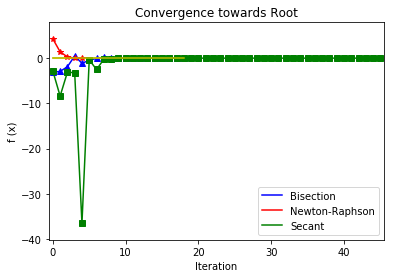

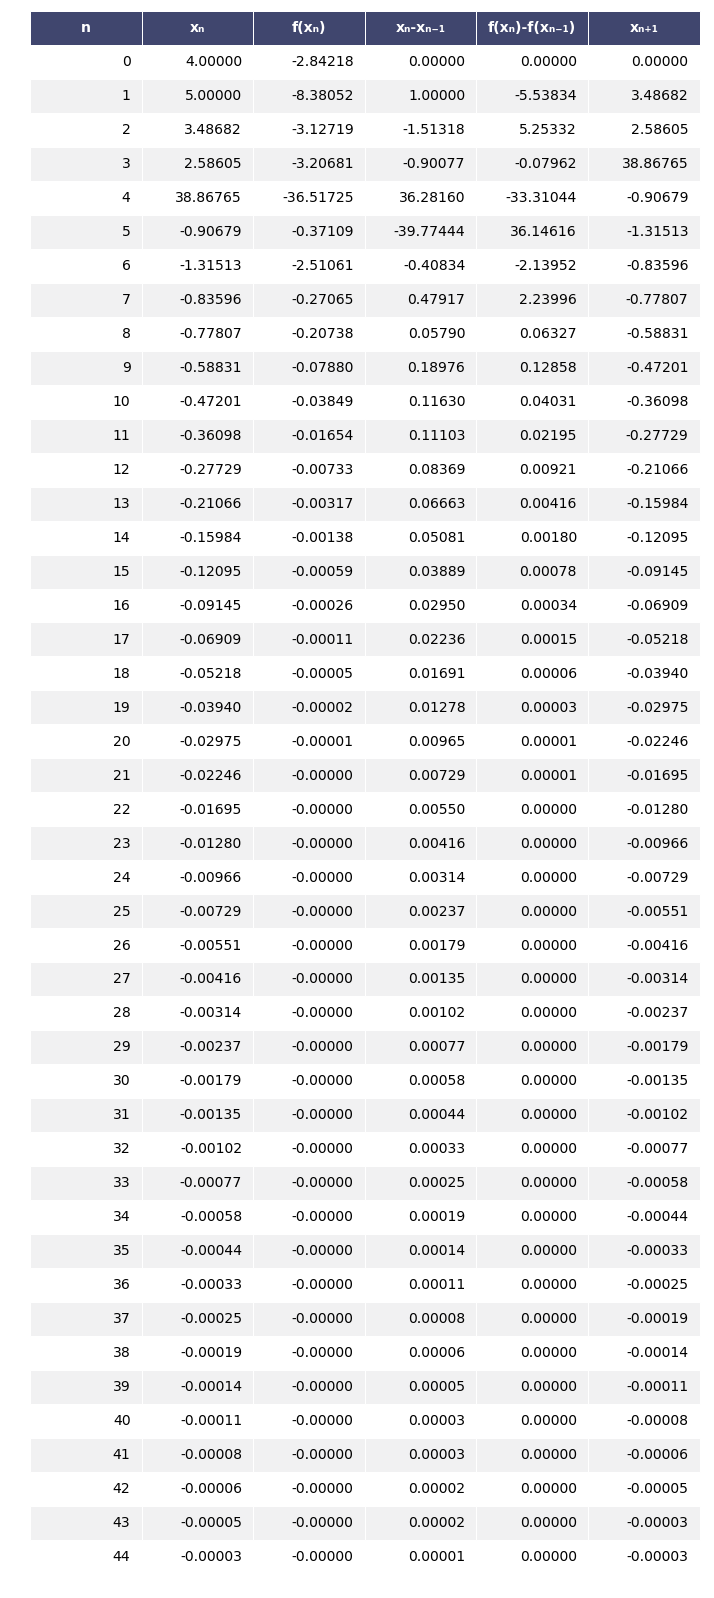

46 46


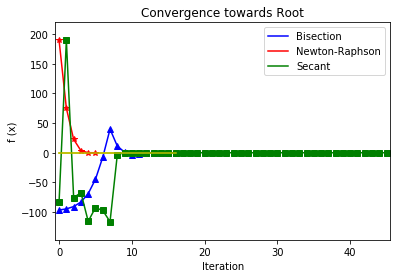

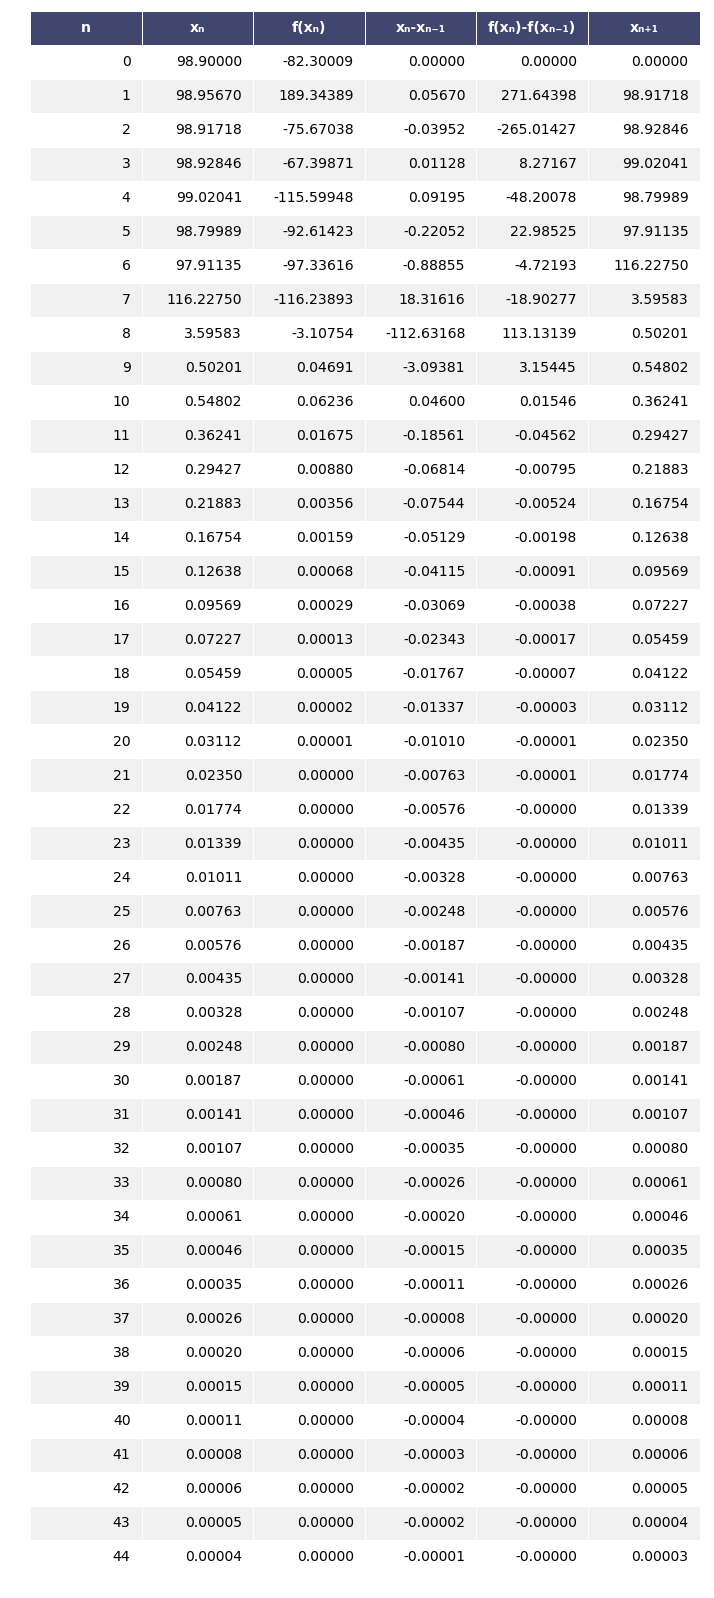

In [0]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.misc import derivative as drv
import six

dx=1e-9

n=11
j=[1 for i in range(n)]
j[0]=j[5]=j[7]=j[10]=2

ar=[[0,0] for i in range(n)]
br=[[0,0] for i in range(n)]
cr=[[0,0] for i in range(n)]
sar=[[0,0] for i in range(n)]
sbr=[[0,0] for i in range(n)]
    
ar[0][0]=0.1
ar[0][1]=-1.5
br[0][0]=1.5
cr[0][0]=2
cr[0][1]=-1.5
sar[0][0]=0.1
sar[0][1]=-1.5
sbr[0][0]=1.5

ar[1][0]=0.1
br[1][0]=2.5
cr[1][0]=2.5
sar[1][0]=0.1
sbr[1][0]=2.5

ar[2][0]=0.1
br[2][0]=1.5
cr[2][0]=2
sar[2][0]=0.1
sbr[2][0]=1.5

ar[3][0]=0.1
br[3][0]=1.5
cr[3][0]=1.5
sar[3][0]=0.1
sbr[3][0]=1.5

ar[4][0]=0.1
br[4][0]=1.5
cr[4][0]=2
sar[4][0]=0.1
sbr[4][0]=1.5

ar[5][0]=0.1
br[5][0]=1.5
cr[5][0]=0
sar[5][0]=0.1
sbr[5][0]=1.5
ar[5][1]=2
br[5][1]=5
cr[5][1]=4
sar[5][1]=2
sbr[5][1]=5

ar[6][0]=0.1
br[6][0]=2
cr[6][0]=2.5
sar[6][0]=0.1
sbr[6][0]=2

ar[7][0]=0.1
br[7][0]=1.5
cr[7][0]=2.5
sar[7][0]=0.1
sbr[7][0]=1.5
ar[7][1]=-1.5
br[7][1]=0
cr[7][1]=-1.5
sar[7][1]=-1.5
sbr[7][1]=0

ar[8][0]=0
br[8][0]=2
cr[8][0]=2
sar[8][0]=0
sbr[8][0]=2

ar[9][0]=1
br[9][0]=1.9
cr[9][0]=2.5
sar[9][0]=1
sbr[9][0]=1.9

ar[10][0]=(np.pi)/2 + 0.001
br[10][0]=3*(np.pi)/2 -0.001
cr[10][0]=4.6
sar[10][0]=4#(np.pi)/2 + 0.001
sbr[10][0]=5#3*(np.pi)/2 -0.001
ar[10][1]=98
br[10][1]=98.9567
cr[10][1]=98.9567
sar[10][1]=98.9
sbr[10][1]=98.9567


def f0(x):
    return x**6 - x - 1
def f1(x):
    return x**3 - x**2 - x - 1
def f2(x):
    return x - 1 - (0.3)*np.cos(x)
def f3(x):
    return np.cos(x)-np.sin(x)-0.5
def f4(x):
    return x-np.exp(-x)
def f5(x):
    return np.sin(x)-np.exp(-x)
def f6(x):
    return x**3-2*x-2
def f7(x):
    return x**4-x-1
def f8(x):
    return np.exp(x)-x-2
def f9(x):
    return 1-x+np.sin(x)
def f10(x):
    return np.tan(x)-x

def f(x,i):
    if i==0:return f0(x)
    elif i==1:return f1(x)
    elif i==2:return f2(x)
    elif i==3:return f3(x)
    elif i==4:return f4(x)
    elif i==5:return f5(x)
    elif i==6:return f6(x)
    elif i==7:return f7(x)
    elif i==8:return f8(x)
    elif i==9:return f9(x)
    else :return f10(x)

def fd(x,i):
  if i==0:return drv(f0,x,dx)
  elif i==1:return drv(f1,x,dx)
  elif i==2:return drv(f2,x,dx)
  elif i==3:return drv(f3,x,dx)
  elif i==4:return drv(f4,x,dx)
  elif i==5:return drv(f5,x,dx)
  elif i==6:return drv(f6,x,dx)
  elif i==7:return drv(f7,x,dx)
  elif i==8:return drv(f8,x,dx)
  elif i==9:return drv(f9,x,dx)
  else :return drv(f10,x,dx)

matrix=[]
fc=[]
i=0

def bisection(a,b,me):
  global matrix,fc,i
  c=(a+b)/2
  fc.append(f(c,me))
  i+=1
  s=np.sign(f(a,me)*f(c,me))
  if(s<0):
    signs='<0'
    assign='b=c'
  else:
    signs='>0'
    assign='a=c'
  #l=[format(a,'0.5f'),format(f(b,me),'0.5f'),format(c,'0.5f'),format(f[i-1],'0.5f'),signs,assign]
  #matrix.append(l)
  if(b-c<1e-5):
    return c
  if(f(a,me)*f(c,me)<0):
    return bisection(a,c,me)
  else:
    return bisection(c,b,me)
    
    
def NR(a0,me):
  global i,fc
 
  fc.append(f(a0,me))
  i+=1
  a1 = a0 - fc[i-1]/fd(a0,me)
  #l=[format(a0,'0.5f'),format(f(a0,me),'0.5f'),format(fc[i-1],'0.5f'),format(a1,'0.5f'),format(a1-a0,'0.5f')]
  #matrix.append(l)
  if(abs(a1-a0)<1e-5):
    return a1
  return NR(a1,me)
    
i2=0
prec=5
sprec='0.'+str(prec)+'f'
def secant(x0,x1,me):
    global i2,fc,matrix
    i2+=1
    m = (f(x0,me)-f(x1,me))/(x0-x1)
    
    x2 = x1 - f(x1,me)/m
    fc.append(f(x2,me))
    l=[i2-2,format(x1,sprec),format(f(x1,me),'0.5f'),format(x1-x0,'0.5f'),format(f(x1,me)-f(x0,me),'0.5f'),format(x2,'0.5f')]
    matrix.append(l)
    if(abs(x2-x1)<1e-5):
      return x2
    return secant(x1,x2,me)
  
  
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
  
for me in range(n):
    if(me!=n-1):continue
    fl=0
    for p in range(j[me]):
      fc=[]
      i=0
      a=ar[me][p]
      b=br[me][p]
      root=bisection(a,b,me)

      plt.figure(1)
      t=np.arange(0,i,1)
      fcm=min(fc)
      fcmx=max(fc)
      plt.axis([-0.5,i-1+0.5,fcm-0.5,fcmx+0.5])
      plt.plot(t,fc,'b^')
      plt.plot(t,fc,'b',label='Bisection')
      i1=i

      matrix=[]
      fc=[]
      i=0  
      c=cr[me][p]
      root=NR(c,me)

      t=np.arange(0,i,1)
      d=(max(fc)-min(fc))/10
      fcm=min(min(fc),fcm)
      fcmx=max(max(fc),fcmx)
      mi=max(i,i1)
      plt.axis([-0.5,mi-1+0.5,fcm-d,fcmx+d])
      ty=np.arange(0,mi,1)
      plt.plot(ty,[0 for x in range (mi)],'y')
      plt.plot(t,fc,'r*')
      plt.plot(t,fc,'r',label='Newton-Raphson')
      plt.xlabel('Iteration')
      plt.ylabel('f (x)')
      plt.legend(loc='best')
      
      fc=[]
      matrix=[]
      x0=sar[me][p]
      x1=sbr[me][p]
      l=[0,format(x0,'0.5f'),format(f(x0,me),'0.5f'),format(0,'0.5f'),format(0,'0.5f'),format(0,'0.5f')]
      matrix.append(l)
      i2=0
      i2+=2
      fc.append(f(x0,me))
      fc.append(f(x1,me))
      ans=secant(x0,x1,me)

      t=np.arange(0,i2,1)
      print(i2,len(fc))
      d=(max(fc)-min(fc))/10
      fcm=min(min(fc),fcm)
      fcmx=max(max(fc),fcmx)
      plt.axis([-0.5,max(max(i,i1),i2)-1+0.5,fcm-d,fcmx+d])
      plt.plot(t,fc,'gs')
      plt.plot(t,fc,'g',label='Secant')
      mi=max(mi,i)
      ty=np.arange(0,mi,1)
      plt.plot(ty,[0 for x in range (mi)],'y')
      plt.title('Convergence towards Root')
      plt.xlabel('Iteration')
      plt.ylabel('f (x)')
      plt.legend(loc='best')
      s='f'+str(me)
      if(j[me]==2):
        if(fl==0):
          s+='a'
          fl=1
        else:
          s+='b'
      #plt.savefig(s)
      #from google.colab import files
      #files.download(s+'.png')
      plt.show()

      names =['n','xₙ','f(xₙ)',"xₙ-xₙ₋₁",'f(xₙ)-f(xₙ₋₁)','xₙ₊₁']
      df = pd.DataFrame(np.asarray(matrix),columns=names)
      p1=render_mpl_table(df, header_columns=0, col_width=2.0)
      plt.savefig(s+'t')
      plt.show()
      #from google.colab import files
      #df.to_csv(s+'t.csv') 
      #files.download(s+'t.csv')
      #files.download(s+'t.png')
      
    
    

6 6


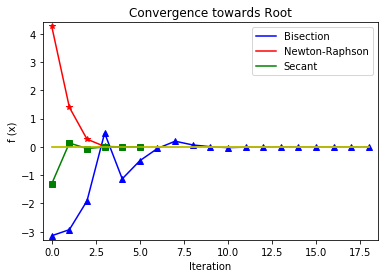

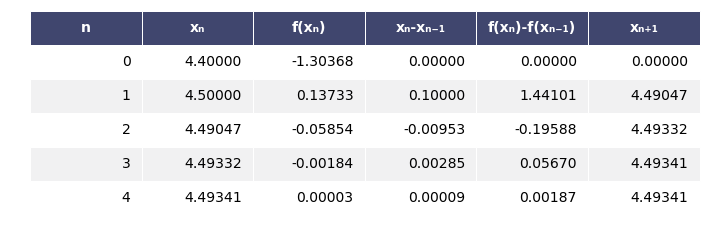

16 16


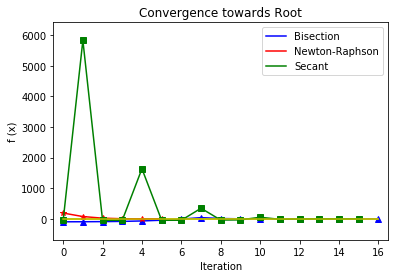

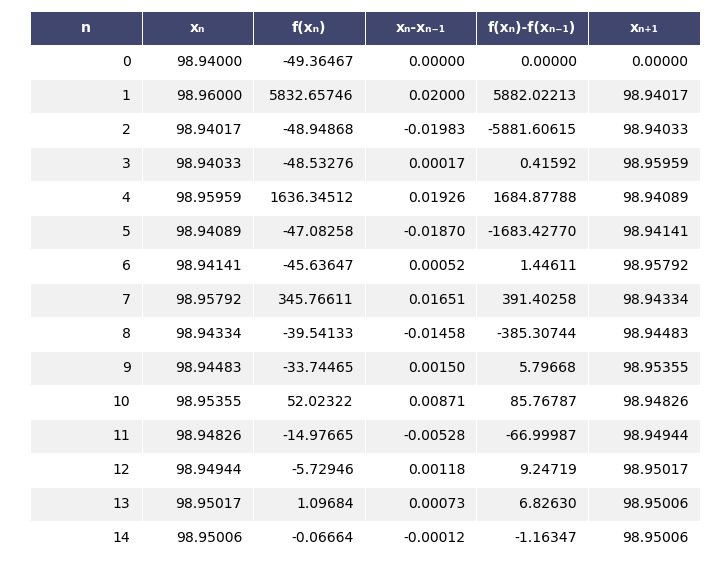

In [0]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.misc import derivative as drv
import six

dx=1e-9

n=11
j=[1 for i in range(n)]
j[0]=j[5]=j[7]=j[10]=2

ar=[[0,0] for i in range(n)]
br=[[0,0] for i in range(n)]
cr=[[0,0] for i in range(n)]
sar=[[0,0] for i in range(n)]
sbr=[[0,0] for i in range(n)]
    
ar[0][0]=0.1
ar[0][1]=-1.5
br[0][0]=1.5
cr[0][0]=2
cr[0][1]=-1.5
sar[0][0]=0.1
sar[0][1]=-1.5
sbr[0][0]=1.5

ar[1][0]=0.1
br[1][0]=2.5
cr[1][0]=2.5
sar[1][0]=0.1
sbr[1][0]=2.5

ar[2][0]=0.1
br[2][0]=1.5
cr[2][0]=2
sar[2][0]=0.1
sbr[2][0]=1.5

ar[3][0]=0.1
br[3][0]=1.5
cr[3][0]=2
sar[3][0]=0.1
sbr[3][0]=1.5

ar[4][0]=0.1
br[4][0]=1.5
cr[4][0]=2
sar[4][0]=0.1
sbr[4][0]=1.5

ar[5][0]=0.1
br[5][0]=1.5
cr[5][0]=0
sar[5][0]=0.1
sbr[5][0]=1.5
ar[5][1]=2
br[5][1]=5
cr[5][1]=4
sar[5][1]=2
sbr[5][1]=5

ar[6][0]=0.1
br[6][0]=2
cr[6][0]=2.5
sar[6][0]=0.1
sbr[6][0]=2

ar[7][0]=0.1
br[7][0]=1.5
cr[7][0]=2.5
sar[7][0]=0.1
sbr[7][0]=1.5
ar[7][1]=-1.5
br[7][1]=0
cr[7][1]=-1.5
sar[7][1]=-1.5
sbr[7][1]=0

ar[8][0]=0
br[8][0]=2
cr[8][0]=2
sar[8][0]=0
sbr[8][0]=2

ar[9][0]=1
br[9][0]=1.9
cr[9][0]=2.5
sar[9][0]=1
sbr[9][0]=1.9

ar[10][0]=(np.pi)/2 + 0.001
br[10][0]=3*(np.pi)/2 -0.001
cr[10][0]=4.6
sar[10][0]=4.4#(np.pi)/2 + 0.001
sbr[10][0]=4.5#3*(np.pi)/2 -0.001
ar[10][1]=98
br[10][1]=98.9567
cr[10][1]=98.9567
sar[10][1]=98.94
sbr[10][1]=98.96


def f0(x):
    return x**6 - x - 1
def f1(x):
    return x**3 - x**2 - x - 1
def f2(x):
    return x - 1 - (0.3)*np.cos(x)
def f3(x):
    return np.cos(x)-np.sin(x)-0.5
def f4(x):
    return x-np.exp(-x)
def f5(x):
    return np.sin(x)-np.exp(-x)
def f6(x):
    return x**3-2*x-2
def f7(x):
    return x**4-x-1
def f8(x):
    return np.exp(x)-x-2
def f9(x):
    return 1-x+np.sin(x)
def f10(x):
    return np.tan(x)-x

def f(x,i):
    if i==0:return f0(x)
    elif i==1:return f1(x)
    elif i==2:return f2(x)
    elif i==3:return f3(x)
    elif i==4:return f4(x)
    elif i==5:return f5(x)
    elif i==6:return f6(x)
    elif i==7:return f7(x)
    elif i==8:return f8(x)
    elif i==9:return f9(x)
    else :return f10(x)

def fd(x,i):
  if i==0:return drv(f0,x,dx)
  elif i==1:return drv(f1,x,dx)
  elif i==2:return drv(f2,x,dx)
  elif i==3:return drv(f3,x,dx)
  elif i==4:return drv(f4,x,dx)
  elif i==5:return drv(f5,x,dx)
  elif i==6:return drv(f6,x,dx)
  elif i==7:return drv(f7,x,dx)
  elif i==8:return drv(f8,x,dx)
  elif i==9:return drv(f9,x,dx)
  else :return drv(f10,x,dx)

matrix=[]
fc=[]
i=0

def bisection(a,b,me):
  global matrix,fc,i
  c=(a+b)/2
  fc.append(f(c,me))
  i+=1
  s=np.sign(f(a,me)*f(c,me))
  if(s<0):
    signs='<0'
    assign='b=c'
  else:
    signs='>0'
    assign='a=c'
  #l=[format(a,'0.5f'),format(f(b,me),'0.5f'),format(c,'0.5f'),format(f[i-1],'0.5f'),signs,assign]
  #matrix.append(l)
  if(b-c<1e-5):
    return c
  if(f(a,me)*f(c,me)<0):
    return bisection(a,c,me)
  else:
    return bisection(c,b,me)
    
    
def NR(a0,me):
  global i,fc
 
  fc.append(f(a0,me))
  i+=1
  a1 = a0 - fc[i-1]/fd(a0,me)
  #l=[format(a0,'0.5f'),format(f(a0,me),'0.5f'),format(fc[i-1],'0.5f'),format(a1,'0.5f'),format(a1-a0,'0.5f')]
  #matrix.append(l)
  if(abs(a1-a0)<1e-5):
    return a1
  return NR(a1,me)
    
i2=0
prec=5
sprec='0.'+str(prec)+'f'
def secant(x0,x1,me):
    global i2,fc,matrix
    i2+=1
    m = (f(x0,me)-f(x1,me))/(x0-x1)
    x2 = x1 - f(x1,me)/m
    fc.append(f(x2,me))
    l=[i2-2,format(x1,sprec),format(f(x1,me),'0.5f'),format(x1-x0,'0.5f'),format(f(x1,me)-f(x0,me),'0.5f'),format(x2,'0.5f')]
    matrix.append(l)
    if(abs(x2-x1)<1e-5):
      return x2
    return secant(x1,x2,me)
  
  
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
  
for me in range(n):
    if(me!=n-1):continue
    fl=0
    for p in range(j[me]):
      fc=[]
      i=0
      a=ar[me][p]
      b=br[me][p]
      root=bisection(a,b,me)

      plt.figure(1)
      t=np.arange(0,i,1)
      fcm=min(fc)
      fcmx=max(fc)
      plt.axis([-0.5,i-1+0.5,fcm-0.5,fcmx+0.5])
      plt.plot(t,fc,'b^')
      plt.plot(t,fc,'b',label='Bisection')
      i1=i

      matrix=[]
      fc=[]
      i=0  
      c=cr[me][p]
      root=NR(c,me)

      t=np.arange(0,i,1)
      d=(max(fc)-min(fc))/10
      fcm=min(min(fc),fcm)
      fcmx=max(max(fc),fcmx)
      mi=max(i,i1)
      plt.axis([-0.5,mi-1+0.5,fcm-d,fcmx+d])
      ty=np.arange(0,mi,1)
      plt.plot(ty,[0 for x in range (mi)],'y')
      plt.plot(t,fc,'r*')
      plt.plot(t,fc,'r',label='Newton-Raphson')
      plt.xlabel('Iteration')
      plt.ylabel('f (x)')
      plt.legend(loc='best')
      
      fc=[]
      matrix=[]
      x0=sar[me][p]
      x1=sbr[me][p]
      l=[0,format(x0,'0.5f'),format(f(x0,me),'0.5f'),format(0,'0.5f'),format(0,'0.5f'),format(0,'0.5f')]
      matrix.append(l)
      i2=0
      i2+=2
      fc.append(f(x0,me))
      fc.append(f(x1,me))
      ans=secant(x0,x1,me)

      t=np.arange(0,i2,1)
      print(i2,len(fc))
      d=(max(fc)-min(fc))/10
      fcm=min(min(fc),fcm)
      fcmx=max(max(fc),fcmx)
      plt.axis([-0.5,max(max(i,i1),i2)-1+0.5,fcm-d,fcmx+d])
      plt.plot(t,fc,'gs')
      plt.plot(t,fc,'g',label='Secant')
      mi=max(mi,i)
      ty=np.arange(0,mi,1)
      plt.plot(ty,[0 for x in range (mi)],'y')
      plt.title('Convergence towards Root')
      plt.xlabel('Iteration')
      plt.ylabel('f (x)')
      plt.legend(loc='best')
      s='f'+str(me)
      if(j[me]==2):
        if(fl==0):
          s+='a'
          fl=1
        else:
          s+='b'
      #plt.savefig(s)
      #from google.colab import files
      #files.download(s+'.png')
      plt.show()

      names =['n','xₙ','f(xₙ)',"xₙ-xₙ₋₁",'f(xₙ)-f(xₙ₋₁)','xₙ₊₁']
      df = pd.DataFrame(np.asarray(matrix),columns=names)
      p1=render_mpl_table(df, header_columns=0, col_width=2.0)
      plt.savefig(s+'t')
      plt.show()
      #from google.colab import files
      #df.to_csv(s+'t.csv') 
      #files.download(s+'t.csv')
      #files.download(s+'t.png')
      
    
    